<!-- WARNING: THIS FILE WAS AUTOGENERATED! DO NOT EDIT! -->

## Data types

The module introduces specialized classes to represent various bioimaging data structures, facilitating seamless integration with machine learning workflows.

In [1]:
#| echo: false
#| output: asis
show_doc(MetaResolver)

---

### MetaResolver

>      MetaResolver (*args, **kwargs)

The `MetaResolver` class addresses metaclass conflicts, ensuring compatibility across different data structures. This is particularly useful when integrating with libraries that have specific metaclass requirements.

**BioImageBase** is a function that acts as a base class for biomedical images. It can be used for many things, such as loading image data as PyTorch tensors, displaying 2D slices of 3D images and making transformations on medical images. 

In [2]:
#| echo: false
#| output: asis
show_doc(BioImageBase)

---

### BioImageBase

>      BioImageBase (*args, **kwargs)

Serving as the foundational class for bioimaging data, `BioImageBase` provides core functionalities for image handling. It ensures that instances of specified types are appropriately cast to this class, maintaining consistency in data representation.

Metaclass casts `x` to this class if it is of type `cls._bypass_type`.

**BioImage** is a specialization of BioImageBase that is specifically used for 2D and 3D biomedical images. To do so, it directly inherits from that class and then squeezes the image data and allows for transformations to be made there.

In [3]:
#| echo: false
#| output: asis
show_doc(BioImage)

---

### BioImage

>      BioImage (*args, **kwargs)

A subclass of `BioImageBase`, the `BioImage` class is tailored for handling both 2D and 3D image objects. It offers methods to load images from various formats and provides access to image properties such as shape and dimensions.

In [ ]:
a = BioImage.create('./data_examples/example_tiff.tiff')
print(a.shape)

torch.Size([1, 96, 512, 512])


In [4]:
#| echo: false
#| output: asis
show_doc(BioImageStack)

---

### BioImageStack

>      BioImageStack (*args, **kwargs)

Designed for 3D image data, `BioImageStack` extends `BioImageBase` to manage volumetric images effectively. 
It includes functionalities for slicing, visualization, and manipulation of 3D data.

In [ ]:
a = BioImageStack.create('./data_examples/example_tiff.tiff', roi=(0, 10))  
print(a.shape)

torch.Size([1, 10, 512, 512])


In [5]:
#| echo: false
#| output: asis
show_doc(BioImageProject)

---

### BioImageProject

>      BioImageProject (*args, **kwargs)

The `BioImageProject` class represents a 3D image stack as a 2D image using maximum intensity projection. This is particularly useful for visualizing volumetric data in a 2D format, aiding in quick assessments and presentations.

In [ ]:
a = BioImageProject.create('./data_examples/example_tiff.tiff', roi=(0, 10))
a.shape

torch.Size([1, 512, 512])

In [6]:
#| echo: false
#| output: asis
show_doc(BioImageMulti)

---

### BioImageMulti

>      BioImageMulti (*args, **kwargs)

For multi-channel 2D images, `BioImageMulti` extends `BioImageBase` to handle data with multiple channels, such as different fluorescence markers in microscopy images.

In [ ]:
# Load a 3D image stack as a multichannel image
a = BioImageMulti.create('./data_examples/example_tiff.tiff', roi=(5, 10))
# Differently from BioImageStack, here the third dimension is encoded as channels.
print(a.shape)

torch.Size([5, 512, 512])


## Data conversion

To facilitate seamless integration between tensors and bioimaging data structures, the module provides conversion utilities.

In [7]:
#| echo: false
#| output: asis
show_doc(Tensor2BioImage)

---

### Tensor2BioImage

>      Tensor2BioImage (cls:__main__.BioImageBase=<class
>                       '__main__.BioImageStack'>)

The `Tensor2BioImage` transform converts tensors into `BioImageBase` instances, enabling the application of bioimaging-specific methods to tensor data. 
This is essential for integrating deep learning models with bioimaging workflows.

## Data Blocks and Dataloader

The module offers classes to construct data blocks and data loaders, streamlining the preparation of datasets for machine learning models.

**BioImageBlock** Creates a new type of TransformBlock specifically for bioimaging data aside from other types like ImageBlock, CategoryBlock and TextBlock.

In [8]:
#| echo: false
#| output: asis
show_doc(BioImageBlock)

---

### BioImageBlock

>      BioImageBlock (cls:__main__.BioImageBase=<class '__main__.BioImage'>)

A `TransformBlock` tailored for bioimaging data, `BioImageBlock` facilitates the creation of data processing pipelines, including transformations and augmentations specific to bioimaging.

The **BioDataBlock** class is built on top of the DataBlock’s class which is provided by the fastai library and is used to build datasets and dataloaders from blocks specifically for biomedical data, offering additionally the option to use BioImageBlock as TransformBlock.

In [9]:
#| echo: false
#| output: asis
show_doc(BioDataBlock)

---

### BioDataBlock

>      BioDataBlock (blocks:list=(<fastai.data.block.TransformBlock object at
>                    0x7f2154dfdc90>, <fastai.data.block.TransformBlock object
>                    at 0x7f2154dfe4d0>), dl_type:fastai.data.core.TfmdDL=None,
>                    get_items=<function get_image_files>, get_y=None,
>                    get_x=None, getters:list=None, n_inp:int=None,
>                    item_tfms:list=None, batch_tfms:list=None, **kwargs)

The `BioDataBlock` class serves as a generic container to build `Datasets` and `DataLoaders` efficiently. It integrates item and batch transformations, getters, and splitters, simplifying the setup of data pipelines for training and validation.

|    | **Type** | **Default** | **Details** |
| -- | -------- | ----------- | ----------- |
| blocks | list | (<fastai.data.block.TransformBlock object at 0x7f2154dfdc90>, <fastai.data.block.TransformBlock object at 0x7f2154dfe4d0>) | One or more `TransformBlock`s |
| dl_type | TfmdDL | None | Task specific `TfmdDL`, defaults to `block`'s dl_type or`TfmdDL` |
| get_items | function | get_image_files |  |
| get_y | NoneType | None |  |
| get_x | NoneType | None |  |
| getters | list | None | Getter functions applied to results of `get_items` |
| n_inp | int | None | Number of inputs |
| item_tfms | list | None | `ItemTransform`s, applied on an item |
| batch_tfms | list | None | `Transform`s or `RandTransform`s, applied by batch |
| kwargs |  |  |  |

The **BioDataLoaders** class is built on top of fastai’s DataLoaders class, and wraps various data loading methods as well as the use of BioImageBlock as TransformBlock

In [10]:
#| echo: false
#| output: asis
show_doc(BioDataLoaders)

---

### BioDataLoaders

>      BioDataLoaders (*loaders, path:str|pathlib.Path='.', device=None)

Basic wrapper around several `DataLoader`s with factory methods for biomedical imaging problems.
Managing multiple `DataLoader` instances, `BioDataLoaders` handles data loading for different phases of model training, such as training, validation, and testing. It ensures efficient data handling and supports various batch processing strategies.

In [11]:
#| echo: false
#| output: asis
show_doc(BioDataLoaders.from_source)

---

### BioDataLoaders.from_source

>      BioDataLoaders.from_source (data_source, show_summary:bool=False,
>                                  path:str|Path='.', bs:int=64,
>                                  val_bs:int=None, shuffle:bool=True,
>                                  device=None)

Create and return a DataLoader from a BioDataBlock using provided keyword arguments.

Returns a  DataLoader: A PyTorch DataLoader object populated with the data from the BioDataBlock.
                If show_summary is True, it also prints a summary of the datablock after creation.

|    | **Type** | **Default** | **Details** |
| -- | -------- | ----------- | ----------- |
| data_source |  |  | The source of the data to be loaded by the dataloader. This can be any type that is compatible with the dataloading method specified in kwargs (e.g., paths, datasets). |
| show_summary | bool | False | If True, print a summary of the BioDataBlock after creation. |
| path | str \| pathlib.Path | . | Path to put in `DataLoaders` |
| bs | int | 64 | Size of batch |
| val_bs | int | None | Size of batch for validation `DataLoader` |
| shuffle | bool | True | Whether to shuffle data |
| device | NoneType | None | Device to put `DataLoaders` |

In [12]:
#| echo: false
#| output: asis
show_doc(BioDataLoaders.from_folder)

---

### BioDataLoaders.from_folder

>      BioDataLoaders.from_folder (path, get_target_fn, train='train',
>                                  valid='valid', valid_pct=None, seed=None,
>                                  item_tfms=None, batch_tfms=None,
>                                  img_cls=<class '__main__.BioImage'>,
>                                  target_img_cls=<class '__main__.BioImage'>,
>                                  show_summary:bool=False, bs:int=64,
>                                  val_bs:int=None, shuffle:bool=True,
>                                  device=None)

Create from dataset in `path` with `train` and `valid` subfolders (or provide `valid_pct`)

|    | **Type** | **Default** | **Details** |
| -- | -------- | ----------- | ----------- |
| path | str \| pathlib.Path | . | Path to put in `DataLoaders` |
| get_target_fn |  |  |  |
| train | str | train |  |
| valid | str | valid |  |
| valid_pct | NoneType | None |  |
| seed | NoneType | None |  |
| item_tfms | NoneType | None |  |
| batch_tfms | NoneType | None |  |
| img_cls | MetaResolver | BioImage |  |
| target_img_cls | MetaResolver | BioImage |  |
| show_summary | bool | False | If True, print a summary of the BioDataBlock after creation. |
| bs | int | 64 | Size of batch |
| val_bs | int | None | Size of batch for validation `DataLoader` |
| shuffle | bool | True | Whether to shuffle data |
| device | NoneType | None | Device to put `DataLoaders` |

In [13]:
#| echo: false
#| output: asis
show_doc(BioDataLoaders.from_df)

---

### BioDataLoaders.from_df

>      BioDataLoaders.from_df (df, path='.', valid_pct=0.2, seed=None, fn_col=0,
>                              folder=None, pref=None, suff='', target_col=1,
>                              target_folder=None, target_suff='',
>                              valid_col=None, item_tfms=None, batch_tfms=None,
>                              img_cls=<class '__main__.BioImage'>,
>                              target_img_cls=<class '__main__.BioImage'>,
>                              show_summary:bool=False, bs:int=64,
>                              val_bs:int=None, shuffle:bool=True, device=None)

Create from `df` using `fn_col` and `target_col`

|    | **Type** | **Default** | **Details** |
| -- | -------- | ----------- | ----------- |
| df |  |  |  |
| path | str \| pathlib.Path | . | Path to put in `DataLoaders` |
| valid_pct | float | 0.2 |  |
| seed | NoneType | None |  |
| fn_col | int | 0 |  |
| folder | NoneType | None |  |
| pref | NoneType | None |  |
| suff | str |  |  |
| target_col | int | 1 |  |
| target_folder | NoneType | None |  |
| target_suff | str |  |  |
| valid_col | NoneType | None |  |
| item_tfms | NoneType | None |  |
| batch_tfms | NoneType | None |  |
| img_cls | MetaResolver | BioImage |  |
| target_img_cls | MetaResolver | BioImage |  |
| show_summary | bool | False | If True, print a summary of the BioDataBlock after creation. |
| bs | int | 64 | Size of batch |
| val_bs | int | None | Size of batch for validation `DataLoader` |
| shuffle | bool | True | Whether to shuffle data |
| device | NoneType | None | Device to put `DataLoaders` |

In [14]:
#| echo: false
#| output: asis
show_doc(BioDataLoaders.from_csv)

---

### BioDataLoaders.from_csv

>      BioDataLoaders.from_csv (path, csv_fname='train.csv', header='path',
>                               delimiter=None, quoting=0, valid_pct=0.2,
>                               seed=None, fn_col=0, folder=None, pref=None,
>                               suff='', target_col=1, target_folder=None,
>                               target_suff='', valid_col=None, item_tfms=None,
>                               batch_tfms=None, img_cls=<class
>                               '__main__.BioImage'>, target_img_cls=<class
>                               '__main__.BioImage'>, show_summary:bool=False,
>                               bs:int=64, val_bs:int=None, shuffle:bool=True,
>                               device=None)

Create from `path/csv_fname` using `fn_col` and `target_col`

|    | **Type** | **Default** | **Details** |
| -- | -------- | ----------- | ----------- |
| path | str \| pathlib.Path | . | Path to put in `DataLoaders` |
| csv_fname | str | train.csv |  |
| header | str | path |  |
| delimiter | NoneType | None |  |
| quoting | int | 0 |  |
| valid_pct | float | 0.2 |  |
| seed | NoneType | None |  |
| fn_col | int | 0 |  |
| folder | NoneType | None |  |
| pref | NoneType | None |  |
| suff | str |  |  |
| target_col | int | 1 |  |
| target_folder | NoneType | None |  |
| target_suff | str |  |  |
| valid_col | NoneType | None |  |
| item_tfms | NoneType | None |  |
| batch_tfms | NoneType | None |  |
| img_cls | MetaResolver | BioImage |  |
| target_img_cls | MetaResolver | BioImage |  |
| show_summary | bool | False | If True, print a summary of the BioDataBlock after creation. |
| bs | int | 64 | Size of batch |
| val_bs | int | None | Size of batch for validation `DataLoader` |
| shuffle | bool | True | Whether to shuffle data |
| device | NoneType | None | Device to put `DataLoaders` |

In [15]:
#| echo: false
#| output: asis
show_doc(BioDataLoaders.class_from_folder)

---

### BioDataLoaders.class_from_folder

>      BioDataLoaders.class_from_folder (path, train='train', valid='valid',
>                                        valid_pct=None, seed=None, vocab=None,
>                                        item_tfms=None, batch_tfms=None,
>                                        img_cls=<class '__main__.BioImage'>,
>                                        show_summary:bool=False, bs:int=64,
>                                        val_bs:int=None, shuffle:bool=True,
>                                        device=None)

Create from dataset in `path` with `train` and `valid` subfolders (or provide `valid_pct`)

|    | **Type** | **Default** | **Details** |
| -- | -------- | ----------- | ----------- |
| path | str \| pathlib.Path | . | Path to put in `DataLoaders` |
| train | str | train |  |
| valid | str | valid |  |
| valid_pct | NoneType | None |  |
| seed | NoneType | None |  |
| vocab | NoneType | None |  |
| item_tfms | NoneType | None |  |
| batch_tfms | NoneType | None |  |
| img_cls | MetaResolver | BioImage |  |
| show_summary | bool | False | If True, print a summary of the BioDataBlock after creation. |
| bs | int | 64 | Size of batch |
| val_bs | int | None | Size of batch for validation `DataLoader` |
| shuffle | bool | True | Whether to shuffle data |
| device | NoneType | None | Device to put `DataLoaders` |

In [16]:
#| echo: false
#| output: asis
show_doc(BioDataLoaders.class_from_df)

---

### BioDataLoaders.class_from_df

>      BioDataLoaders.class_from_df (df, path='.', valid_pct=0.2, seed=None,
>                                    fn_col=0, folder=None, suff='',
>                                    label_col=1, label_delim=None,
>                                    y_block=None, valid_col=None,
>                                    item_tfms=None, batch_tfms=None,
>                                    img_cls=<class '__main__.BioImage'>,
>                                    show_summary:bool=False, bs:int=64,
>                                    val_bs:int=None, shuffle:bool=True,
>                                    device=None)

Create from `df` using `fn_col` and `label_col`

|    | **Type** | **Default** | **Details** |
| -- | -------- | ----------- | ----------- |
| df |  |  |  |
| path | str \| pathlib.Path | . | Path to put in `DataLoaders` |
| valid_pct | float | 0.2 |  |
| seed | NoneType | None |  |
| fn_col | int | 0 |  |
| folder | NoneType | None |  |
| suff | str |  |  |
| label_col | int | 1 |  |
| label_delim | NoneType | None |  |
| y_block | NoneType | None |  |
| valid_col | NoneType | None |  |
| item_tfms | NoneType | None |  |
| batch_tfms | NoneType | None |  |
| img_cls | MetaResolver | BioImage |  |
| show_summary | bool | False | If True, print a summary of the BioDataBlock after creation. |
| bs | int | 64 | Size of batch |
| val_bs | int | None | Size of batch for validation `DataLoader` |
| shuffle | bool | True | Whether to shuffle data |
| device | NoneType | None | Device to put `DataLoaders` |

In [17]:
#| echo: false
#| output: asis
show_doc(BioDataLoaders.class_from_csv)

---

### BioDataLoaders.class_from_csv

>      BioDataLoaders.class_from_csv (path, csv_fname='labels.csv',
>                                     header='infer', delimiter=None, quoting=0,
>                                     valid_pct=0.2, seed=None, fn_col=0,
>                                     folder=None, suff='', label_col=1,
>                                     label_delim=None, y_block=None,
>                                     valid_col=None, item_tfms=None,
>                                     batch_tfms=None, img_cls=<class
>                                     '__main__.BioImage'>,
>                                     show_summary:bool=False, bs:int=64,
>                                     val_bs:int=None, shuffle:bool=True,
>                                     device=None)

Create from `path/csv_fname` using `fn_col` and `label_col`

|    | **Type** | **Default** | **Details** |
| -- | -------- | ----------- | ----------- |
| path | str \| pathlib.Path | . | Path to put in `DataLoaders` |
| csv_fname | str | labels.csv |  |
| header | str | infer |  |
| delimiter | NoneType | None |  |
| quoting | int | 0 |  |
| valid_pct | float | 0.2 |  |
| seed | NoneType | None |  |
| fn_col | int | 0 |  |
| folder | NoneType | None |  |
| suff | str |  |  |
| label_col | int | 1 |  |
| label_delim | NoneType | None |  |
| y_block | NoneType | None |  |
| valid_col | NoneType | None |  |
| item_tfms | NoneType | None |  |
| batch_tfms | NoneType | None |  |
| img_cls | MetaResolver | BioImage |  |
| show_summary | bool | False | If True, print a summary of the BioDataBlock after creation. |
| bs | int | 64 | Size of batch |
| val_bs | int | None | Size of batch for validation `DataLoader` |
| shuffle | bool | True | Whether to shuffle data |
| device | NoneType | None | Device to put `DataLoaders` |

In [18]:
#| echo: false
#| output: asis
show_doc(BioDataLoaders.class_from_lists)

---

### BioDataLoaders.class_from_lists

>      BioDataLoaders.class_from_lists (path, fnames, labels, valid_pct=0.2,
>                                       seed:int=None, y_block=None,
>                                       item_tfms=None, batch_tfms=None,
>                                       img_cls=<class '__main__.BioImage'>,
>                                       show_summary:bool=False, bs:int=64,
>                                       val_bs:int=None, shuffle:bool=True,
>                                       device=None)

Create from list of `fnames` and `labels` in `path`

|    | **Type** | **Default** | **Details** |
| -- | -------- | ----------- | ----------- |
| path | str \| pathlib.Path | . | Path to put in `DataLoaders` |
| fnames |  |  |  |
| labels |  |  |  |
| valid_pct | float | 0.2 |  |
| seed | int | None |  |
| y_block | NoneType | None |  |
| item_tfms | NoneType | None |  |
| batch_tfms | NoneType | None |  |
| img_cls | MetaResolver | BioImage |  |
| show_summary | bool | False | If True, print a summary of the BioDataBlock after creation. |
| bs | int | 64 | Size of batch |
| val_bs | int | None | Size of batch for validation `DataLoader` |
| shuffle | bool | True | Whether to shuffle data |
| device | NoneType | None | Device to put `DataLoaders` |

## Data getters

Functions to retrieve specific data components are provided, aiding in the organization and preprocessing of datasets.

In [19]:
#| echo: false
#| output: asis
show_doc(get_gt)

---

### get_gt

>      get_gt (path_gt, gt_file_name='avg50.png')

The `get_gt` function retrieves ground truth data, essential for supervised learning tasks. 
It ensures that the correct labels or annotations are associated with each data sample.

This function constructs a path to a ground truth file based on the given `path_gt` and `gt_file_name`.    
It uses a lambda function to create a new path by appending `gt_file_name` to 
the parent directory of the input file, as specified by `path_gt`.

Returns a callable: A function that takes a single argument (a filename) and returns a Path object 
               representing the full path to the ground truth file. When called with a filename, 
               this function constructs the path by combining `path_gt` or the parent directory of 
               the filename with `gt_file_name`.

|    | **Type** | **Default** | **Details** |
| -- | -------- | ----------- | ----------- |
| path_gt |  |  | The base directory where the ground truth files are stored, or a file path from which to derive the parent directory. |
| gt_file_name | str | avg50.png | The name of the ground truth file. |

The `get_target` function constructs and returns functions for generating file paths to "target" files based on given input parameters. 
This function is particularly useful for tasks where the target files are stored in a different directory or have a different naming convention compared to the input files.

In [20]:
#| echo: false
#| output: asis
show_doc(get_target)

---

### get_target

>      get_target (path:str, same_filename=True, target_file_prefix='target',
>                  signal_file_prefix='signal', relative_path=False)

Constructs and returns functions for generating file paths to "target" files based on given input parameters.

This function defines two nested helper functions within its scope: 

    - `construct_target_filename(file_name)`: Constructs a target file name by inserting the specified prefix into the original file name.
    - `generate_target_path(file_name)`: Generates a path to the target file based on whether `same_filename` is set to True or False.

The main function returns the appropriate helper function based on the value of `same_filename`.

Returns a callable: A function that takes a file name as input and returns its corresponding target file path based on the specified parameters.

|    | **Type** | **Default** | **Details** |
| -- | -------- | ----------- | ----------- |
| path | str |  | The base directory where the files are located. This should be a string representing an absolute or relative path. |
| same_filename | bool | True | If True, the target file name will match the original file name; otherwise, it will use the specified prefix. |
| target_file_prefix | str | target | The prefix to insert into the target file name if `same_filename` is False. |
| signal_file_prefix | str | signal | The prefix used in the original file names that should be replaced by the target prefix. |
| relative_path | bool | False | If True, it indicates that the path is relative to the parent folder in the path where the input files are located. |

The function `get_target` can be used to look for target files in different folders using either absolute or relative paths:

In [ ]:
print(get_target('train_folder/target', same_filename=False)('../signal/signal01.tif'))
print(get_target('target', relative_path=True)('../train_folder/signal/image01.tif'))

train_folder/target/target01.tif
../train_folder/target/image01.tif


...and it can look for target files with different names but same numbering:

In [ ]:
print(get_target('GT', relative_path=True, same_filename=False, target_file_prefix="image_clean", signal_file_prefix="image_noisy")('train_folder/signal/image_noisy_01.tif'))

train_folder/GT/image_clean_01.tif


It also supports more general cases:

In [ ]:
print(get_target('GT', relative_path=True, same_filename=False, target_file_prefix="clean", signal_file_prefix="noisy")('train_folder/signal/01_image_noisy_dataset.tif'))

train_folder/GT/01_image_clean_dataset.tif


For tasks involving unsupervised denoising or noise analysis, `get_noisy_pair` retrieves pairs of noisy data, enabling the training of models such as N2N.

In [21]:
#| echo: false
#| output: asis
show_doc(get_noisy_pair)

---

### get_noisy_pair

>      get_noisy_pair (fn)

Get another "noisy" version of the input file by selecting a file from the same directory.

This function first retrieves all image files in the directory of the input file `fn` (excluding subdirectories). 
It then selects one of these files at random, ensuring that it is not the original file itself to avoid creating a trivial "noisy" pair.

Parameters: 

    fn (Path or str): The path to the original image file. This should be a Path object but accepts string inputs for convenience.

Returns: 

    Path: A Path object pointing to the selected noisy file.

## Data Display

Visualization functions are included to display batches of data and model results, aiding in qualitative assessments and debugging.

In [ ]:
#| echo: false
#| output: asis
show_doc(show_batch)

In [ ]:
#| echo: false
#| output: asis
show_doc(show_batch)

### show_batch
> ```  
> show_batch (x:BioImageBase, y:BioImageBase, samples,
>             ctxs=None, max_n:int=10, nrows:int=None, ncols:int=None,
>             figsize:tuple=None, **kwargs)
> ```


The `show_batch` function visualizes a batch of data samples, allowing users to inspect the input data and verify preprocessing steps.

Returns: List[Context]: A list of contexts after displaying the images and labels.

| | Type           | Default     | Details                                                         |
|-----------|-----|-------------|-----------------------------------------------------------------|
| x              | BioImageBase | | The input image data.                                           |
| y              | BioImageBase | | The target label data.                                          |
| samples        |             | | List of sample indices to display.                              |
| ctxs           | NoneType     | | List of contexts for displaying images. If None, create new ones using `get_grid()`. |
| max_n          | int          | 10 | Maximum number of samples to display.        |
| nrows          | int          | None | Number of rows in the grid if `ctxs` are not provided.      |
| ncols          | int          | None | Number of columns in the grid if `ctxs` are not provided.   |
| figsize        | tuple        | None | Figure size for the image display.                          |
| kwargs         |            | | Additional keyword arguments.                                   |


In [ ]:
#| echo: false
#| output: asis
show_doc(show_results)

In [ ]:
#| echo: false
#| output: asis
show_doc(show_results)

### show_results
> ```
> show_results (x: BioImageBase, y: BioImageBase, samples,
>               outs, ctxs=None, max_n=10, figsize=None, **kwargs)
> ```

After model inference, `show_results` displays the model's predictions alongside the ground truth, facilitating the evaluation of model performance.

Returns:

List[Context]: A list of contexts after displaying the images and labels.


|   | Type           | Default     | Details                                                         |
|-----------|-----|-------------|-----------------------------------------------------------------|
| x              | BioImageBase | | The input image data.                                           |
| y              | BioImageBase | | The target label data.                                          |
| samples        |             | | List of sample indices to display.                              |
| outs           |          |   | List of output predictions corresponding to the samples. |
| ctxs           | NoneType     | | List of contexts for displaying images. If None, create new ones using `get_grid()`. |
| max_n          | int        | 10  | 
| figsize        | tuple        | None | Figure size for the image display.                          |
| kwargs         |            | | Additional keyword arguments.                                   |


## Preprocessing

The module provides functions for data preprocessing, including patch extraction and dimensionality reduction, essential for preparing data for machine learning models.

In [22]:
#| echo: false
#| output: asis
show_doc(extract_patches)

---

### extract_patches

>      extract_patches (data, patch_size, overlap)

Extracts n-dimensional patches from the input data.

Returns:
- A list of patches as numpy arrays.

|    | **Details** |
| -- | ----------- |
| data | numpy array of the input data (n-dimensional). |
| patch_size | tuple of integers defining the size of the patches in each dimension. |
| overlap | float (between 0 and 1) indicating overlap between patches. |

The `extract_patches` function divides images into smaller patches, which is useful for training models on localized regions of interest, especially when dealing with high-resolution images.

In [ ]:
data = np.random.rand(100, 100, 3)  # Example 3D data
patch_size = (64,64,2)
overlap = 0.5
patches = extract_patches(data, patch_size, overlap)
print("Number of generated patches:", len(patches))
patches[0].shape

Number of generated patches: 8


(64, 64, 2)

In [23]:
#| echo: false
#| output: asis
show_doc(save_patches_grid)

---

### save_patches_grid

>      save_patches_grid (data_folder, gt_folder, output_folder, patch_size,
>                         overlap, threshold=None, squeeze_input=True,
>                         squeeze_patches=False, csv_output=True,
>                         train_test_split_ratio=0.8, tfms_before:List=None,
>                         tfms_after:List=None)

Loads n-dimensional data from data_folder and gt_folder, generates patches, and saves them into individual HDF5 files.
Each HDF5 file will have datasets with the structure X/patch_idx and y/patch_idx.

|    | **Type** | **Default** | **Details** |
| -- | -------- | ----------- | ----------- |
| data_folder |  |  | Path to the folder containing data files (n-dimensional data). |
| gt_folder |  |  | Path to the folder containing ground truth (gt) files (n-dimensional data). |
| output_folder |  |  | Path to the folder where the HDF5 files will be saved. |
| patch_size |  |  | tuple of integers defining the size of the patches. |
| overlap |  |  | float (between 0 and 1) defining the overlap between patches. |
| threshold | NoneType | None | If provided, patches with a mean value below this threshold will be discarded. |
| squeeze_input | bool | True | If True, squeeze the input data to remove single-dimensional entries. |
| squeeze_patches | bool | False | If True, squeeze the patches to remove single-dimensional entries. |
| csv_output | bool | True | If True, a CSV file listing all patch paths is created. |
| train_test_split_ratio | float | 0.8 | Ratio of data to split into train and test CSV files (e.g., 0.8 for 80% train). |
| tfms_before | List | None | List of transforms to apply before extracting patches. |
| tfms_after | List | None | List of transforms to apply after extracting patches. |

After extracting patches, `save_patches_grid` saves them in a grid format, facilitating visualization and inspection of the patches.

In [ ]:
from bioMONAI.transforms import Blur

In [ ]:
data_folder = './data_examples/Confocal_BPAE_B'
# For the sake of simplicity, in this example we use the same folder for ground truth
gt_folder = './data_examples/Confocal_BPAE_B' 
output_folder = './_test'
patch_size = (64,64)
overlap = 0
save_patches_grid(data_folder, gt_folder, output_folder, patch_size, overlap, squeeze_input=True, tfms_after=[Blur(ksize=15)])

Processing files: 100%|██████████| 2/2 [00:00<00:00, 28.19it/s]

CSV files saved to: ./_test/train_patches.csv and ./_test/test_patches.csv


In [ ]:
from bioMONAI.io import hdf5_reader, split_hdf_path
from bioMONAI.visualize import plot_image

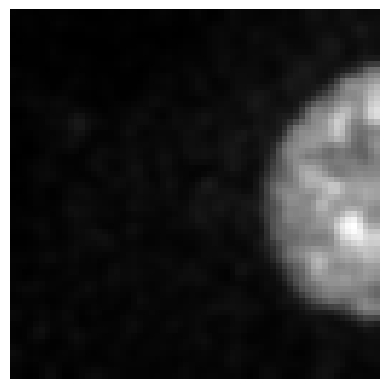

In [ ]:
file_path = './_test/HV110_P0500510000.h5/X/1'

im , _ = hdf5_reader()(file_path)
plot_image(im)

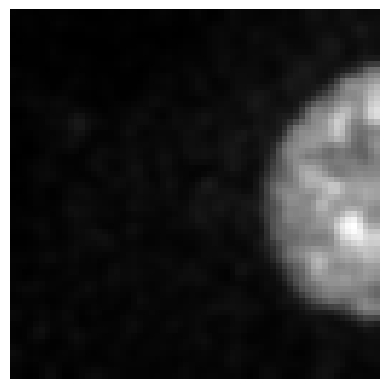

In [ ]:
file_path = './_test/HV110_P0500510000.h5/y/1'

im , _ = hdf5_reader()(file_path)
plot_image(im)

### Example 

In [ ]:
from bioMONAI.core import apply_transforms
from bioMONAI.transforms import Blur, RandFlip

In [ ]:
# List of transformations defined from the bioMONAI transforms module 
transforms_list = [
    Blur(ksize=15, prob=1.0), 
    RandFlip(prob=1.0, spatial_axis=1, ndim=2)
]

In [ ]:
data_folder = './data_examples/Confocal_BPAE_B'
# For the sake of simplicity, in this example we use the same folder for ground truth
gt_folder = './data_examples/Confocal_BPAE_B' 
output_folder = './_test_tfms'
patch_size = (64,64)
overlap = 0
save_patches_grid(data_folder, gt_folder, output_folder, patch_size, overlap, squeeze_input=True, tfms_after=transforms_list)

Processing files: 100%|██████████| 2/2 [00:00<00:00, 22.17it/s]

CSV files saved to: ./_test_tfms/train_patches.csv and ./_test_tfms/test_patches.csv


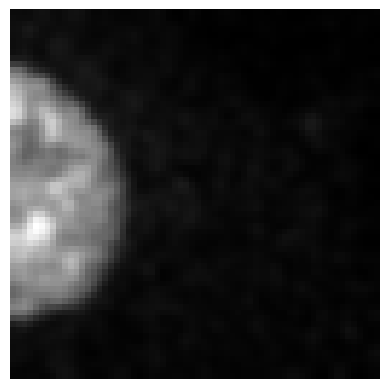

In [ ]:
file_path = './_test_tfms/HV110_P0500510000.h5/X/1'

im , _ = hdf5_reader()(file_path)
plot_image(im)

In [24]:
#| echo: false
#| output: asis
show_doc(extract_random_patches)

---

### extract_random_patches

>      extract_random_patches (data_tuple, patch_size, num_patches)

Extracts a specified number of random n-dimensional patches from the input data and ground truth data.

Returns:
- A tuple of lists containing randomly cropped patches as numpy arrays (input_patches, gt_patches).

|    | **Details** |
| -- | ----------- |
| data_tuple | tuple of numpy arrays (input data, ground truth data). |
| patch_size | tuple of integers defining the size of the patches in each dimension. |
| num_patches | number of random patches to extract. |

In [25]:
#| echo: false
#| output: asis
show_doc(save_patches_random)

---

### save_patches_random

>      save_patches_random (data_folder, gt_folder, output_folder, patch_size,
>                           num_patches, threshold=None, squeeze_input=True,
>                           squeeze_patches=False, csv_output=True,
>                           train_test_split_ratio=0.8, tfms_before:List=None,
>                           tfms_after:List=None)

Loads n-dimensional data from data_folder and gt_folder, generates random patches, and saves them into individual HDF5 files.
Each HDF5 file will have datasets with the structure X/patch_idx and y/patch_idx.

|    | **Type** | **Default** | **Details** |
| -- | -------- | ----------- | ----------- |
| data_folder |  |  | Path to the folder containing data files (n-dimensional data). |
| gt_folder |  |  | Path to the folder containing ground truth (gt) files (n-dimensional data). |
| output_folder |  |  | Path to the folder where the HDF5 files will be saved. |
| patch_size |  |  | tuple of integers defining the size of the patches. |
| num_patches |  |  | number of random patches to extract per file. |
| threshold | NoneType | None | If provided, patches with a mean value below this threshold will be discarded. |
| squeeze_input | bool | True | If True, squeezes singleton dimensions in the input data. |
| squeeze_patches | bool | False | If True, squeezes singleton dimensions in the patches. |
| csv_output | bool | True | If True, a CSV file listing all patch paths is created. |
| train_test_split_ratio | float | 0.8 | Ratio of data to split into train and test CSV files (e.g., 0.8 for 80% train). |
| tfms_before | List | None | List of transforms to apply before extracting patches. |
| tfms_after | List | None | List of transforms to apply after extracting patches. |

In [ ]:
data_folder = './data_examples/Confocal_BPAE_B' 
gt_folder = './data_examples/Confocal_BPAE_B' 
output_folder = './_test2'
patch_size = (64,64)
num_patches= 2
save_patches_random(data_folder, gt_folder, output_folder, patch_size, num_patches, squeeze_input=True, tfms_before=[Blur(ksize=15)])

Processing files: 100%|██████████| 2/2 [00:00<00:00, 57.88it/s]

CSV files saved to: ./_test2/train_patches.csv and ./_test2/test_patches.csv


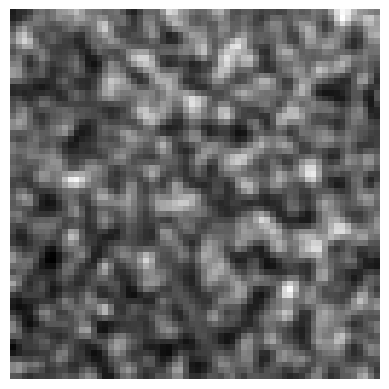

In [ ]:
file_path = './_test2/HV110_P0500510000_random_patches.h5/X/1'

im , _ = hdf5_reader()(file_path)
plot_image(im)

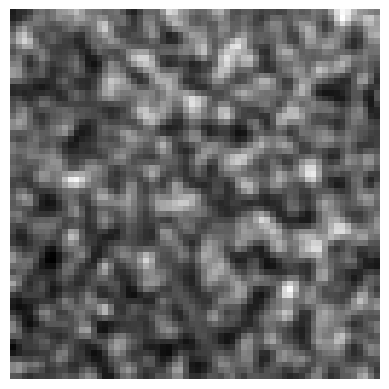

In [ ]:
file_path = './_test2/HV110_P0500510000_random_patches.h5/y/1'

im , _ = hdf5_reader()(file_path)
plot_image(im)

In [26]:
#| echo: false
#| output: asis
show_doc(dict2string)

---

### dict2string

>      dict2string (d, item_sep='_', key_value_sep='', pad_zeroes=None)

Transforms a dictionary into a string with customizable separators and optional zero padding for integers.

Returns the formatted dictionary as a string.

|    | **Type** | **Default** | **Details** |
| -- | -------- | ----------- | ----------- |
| d |  |  | The dictionary to convert. |
| item_sep | str | _ | The separator between dictionary items (default is ", "). |
| key_value_sep | str |  | The separator between keys and values (default is ": "). |
| pad_zeroes | NoneType | None | The minimum width for integer values, padded with zeros. If None, no padding is applied. |

In [ ]:
my_dict = {'C': 2, 'Z': 30, 'S': 1}
result = dict2string(my_dict, pad_zeroes=3)
print(result)

C002_Z030_S001


In [27]:
#| echo: false
#| output: asis
show_doc(remove_singleton_dims)

---

### remove_singleton_dims

>      remove_singleton_dims (substack, order)

Remove dimensions with a size of 1 from both the substack and the order string.

Returns: 

    substack (np.array): The substack with singleton dimensions removed.
    new_order (str): The updated dimension order string.

|    | **Details** |
| -- | ----------- |
| substack | The extracted substack data. |
| order | The dimension order string (e.g., 'CZYX'). |

In [28]:
#| echo: false
#| output: asis
show_doc(extract_substacks)

---

### extract_substacks

>      extract_substacks (input_file, output_dir=None, indices=None,
>                         split_dimension=None, squeeze_dims=True, *kwargs)

Extract substacks from a multidimensional OME-TIFF stack using AICSImageIO.

|    | **Type** | **Default** | **Details** |
| -- | -------- | ----------- | ----------- |
| input_file |  |  | Path to the input OME-TIFF file. |
| output_dir | NoneType | None | Directory to save the extracted substacks. If a list, the substacks will be saved in the corresponding subdirectories from the list. |
| indices | NoneType | None | A dictionary specifying which indices to extract. Keys can include 'C' for channel, 'Z' for z-slice, 'T' for time point, and 'S' for scene. If None, all indices are extracted. |
| split_dimension | NoneType | None | Dimension to split substacks along. If provided, separate substacks will be generated for each index in the split_dimension. Must be one of the keys in indices. |
| squeeze_dims | bool | True | Dimension to squeeze substacks along. |
| kwargs |  |  |  |

In [ ]:
output_dir = "./_test_folder/"
subdirs = [output_dir + folder for folder in ["channel_0", "channel_1", "channel_2"]]
subdirs

['./_test_folder/channel_0',
 './_test_folder/channel_1',
 './_test_folder/channel_2']

In [ ]:
[os.path.join([output_dir][0], f"{subdirs[0]}_{ii}") for ii in range(2)]

['./_test_folder/./_test_folder/channel_0_0',
 './_test_folder/./_test_folder/channel_0_1']

In [ ]:
filename = './data_examples/2155a4fe_3500000635_100X_20170227_E08_P21.ome.tiff'

# This extracts a single substack for channel 0, z-slice 5, and time point 0.
extract_substacks(filename, output_dir=output_dir, indices={"C": 0, "Z": range(35), "T": 0})

Extracted substack saved to: ./_test_folder/2155a4fe_3500000635_100X_20170227_E08_P21_substack_C0_Zrange(0, 35)_T0.ome.tiff


In [ ]:
# This extracts substacks for each channel (`C`) and saves them in separate subfolders named "C_0", "C_1", "C_2", etc.
extract_substacks(filename, output_dir=[output_dir], indices={"C": [0, 1, 2], "Z": 5, "T": 0}, split_dimension="C")

Extracted substack saved to: ./_test_folder/C_0/2155a4fe_3500000635_100X_20170227_E08_P21_substack_C0_Z5_T0.ome.tiff
Extracted substack saved to: ./_test_folder/C_1/2155a4fe_3500000635_100X_20170227_E08_P21_substack_C1_Z5_T0.ome.tiff
Extracted substack saved to: ./_test_folder/C_2/2155a4fe_3500000635_100X_20170227_E08_P21_substack_C2_Z5_T0.ome.tiff


In [ ]:
# This extracts substacks for each channel and saves them in directories "channel_0", "channel_1", and "channel_2".
extract_substacks(filename, output_dir=subdirs, indices={"C": [0, 1, 2], "Z": 5}, split_dimension="C")

Extracted substack saved to: ./_test_folder/channel_0/2155a4fe_3500000635_100X_20170227_E08_P21_substack_C0_Z5.ome.tiff
Extracted substack saved to: ./_test_folder/channel_1/2155a4fe_3500000635_100X_20170227_E08_P21_substack_C1_Z5.ome.tiff
Extracted substack saved to: ./_test_folder/channel_2/2155a4fe_3500000635_100X_20170227_E08_P21_substack_C2_Z5.ome.tiff
